# Import Library

In [2]:
# Author - Kaveesha Baddage

# Install spaCy and neuralcoref with correct versions 

# !pip install -U spacy==2.1.0 

!python -m spacy download en

# !pip uninstall -y neuralcoref 

# !pip install neuralcoref --no-binary neuralcoref

!pip install pattern
!pip install clean-text
!pip install optuna

/usr/local/lib/python3.9/dist-packages/torch/cuda/__init__.py:497: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")
2023-03-20 13:25:22.647727: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-03-20 13:25:24.530779: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/nvidia/lib:/usr/local/nvidia/lib64
2023-03-20 13:25:24.530957: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open share

In [3]:
# Import necessary libraries
import keras
import numpy as np
import pandas as pd
import nltk
import os
import nltk.corpus
# import spacy
# import neuralcoref

In [4]:
nltk.download('punkt')
nltk.download('omw-1.4')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

# Text Preprocessing

## Load Data

In [5]:
sanook = pd.read_csv('dataset/data_set_crime.txt', sep='|')
sanook

,title,content
0,The young man drove the rich on the highway.Li...,The young man lifted up the police station. 1 ...
1,Grandma led the grandchildren to report more.T...,"Grandmother, Primary 5, reported to the offens..."
2,8 -year -old girl raped by a neighborThe wife ...,8 -year -old girl raped by a neighbor The wife...
3,"Stepfather-real mother, attacking his 6-year-o...",The true stepfather-mother attacked the 6-year...
4,"Certainly drunk, Closed Circuit, capturing a g...","Closed circuit captures a minute, a taxi, a 76..."
...,...,...
952,"The old man is faint, 4 years old until the bl...",The police at Na Pho police station in Buriram...
953,The security guards followed the security guar...,"At 09.00 hrs. On 21 September, Pol.Col. Sathit..."
954,"6 wheels break!Crashed into the motorcycle, ex...",6 -wheel trucks In the middle of the intersect...
955,Broker hiring a 13 -year -old girl to work in ...,Broker hiring a 13 -year -old girl to work in ...


In [6]:
thairath = pd.read_csv('dataset/data_set_crime_thairath_en.txt', sep='|')
thairath

,title,content
0,Maj. Gen. Wirachai Mercy shaved his head and m...,"Enter the parachute ""Maj. Gen. Wirachai Songme..."
1,"Rescuers find important evidence, axe-knife of...",The rescuer found the axe-knife of the middle....
2,"To issue the ""Police Sword Ching Thong"", order...","Chief Of Staff Sign the order for the ""Police ..."
3,Police sword Ching Thong confessed to the stre...,"Big Joke Pol. Gen. Surachet Hakpal, Deputy Chi..."
4,Drunkenness Stepson extinguished from mother-i...,"Dragging his neck to the smoke, a drunken youn..."
...,...,...
778,The police officer has been deceived by the ca...,The victim's representative cried. The police ...
779,No surprises. Prosecutor Star points to waterm...,Star Prosecutor points to the watermelon case....
780,"191 Attached to the rank of ""Police Dog"" to ""A...",Commander 191 was awarded the Police Dog Award...
781,"3 men selling marijuana, robbing tourists, cla...",3 young men selling marijuana on Khao San Road...


In [7]:
df_raw_crime = pd.concat([sanook, thairath], join="inner", ignore_index=True)
df_raw_crime

,title,content
0,The young man drove the rich on the highway.Li...,The young man lifted up the police station. 1 ...
1,Grandma led the grandchildren to report more.T...,"Grandmother, Primary 5, reported to the offens..."
2,8 -year -old girl raped by a neighborThe wife ...,8 -year -old girl raped by a neighbor The wife...
3,"Stepfather-real mother, attacking his 6-year-o...",The true stepfather-mother attacked the 6-year...
4,"Certainly drunk, Closed Circuit, capturing a g...","Closed circuit captures a minute, a taxi, a 76..."
...,...,...
1735,The police officer has been deceived by the ca...,The victim's representative cried. The police ...
1736,No surprises. Prosecutor Star points to waterm...,Star Prosecutor points to the watermelon case....
1737,"191 Attached to the rank of ""Police Dog"" to ""A...",Commander 191 was awarded the Police Dog Award...
1738,"3 men selling marijuana, robbing tourists, cla...",3 young men selling marijuana on Khao San Road...


In [8]:
df_raw_sport = pd.read_csv('dataset/data_set_sport.txt', sep='|')
df_raw_sport

,title,content
0,"Can play every day!Opening the warp ""Kim Mi-Ju...","Take to know Kim Mi-Ju, one of the famous Sout..."
1,"Big chest is the reason!""Minami Wiji"" from a f...","Regarded as another beautiful girl, raw fish t..."
2,Summary of the Premier League football match 2...,"The head of the Man City opened the house, won..."
3,"Clear angels ""Phen Pheng"", the most female mod...",Considered as another girl who likes to exerci...
4,"Come quickly!The most famous guru ""Ten Hak"" wa...",The famous Richard Key Guru revealed that the ...
...,...,...
921,"Not disappointed!Thailand smashed Taiwan 3-1, ...","October 7, 20:00 at 16:00 hrs. At Viet Tri Sta..."
922,Beyond resistance!Thai women volleyball defeat...,The 2022 World Women's Volleyball Championship...
923,The second half!Buriram United invaded Lamphun...,"Handrax Revo Thai League 2022/23, 8th Friday, ..."
924,"Eliminated but impressed!Foreign comments""Thai...",3 matches have passed for the Thai female rubb...


In [9]:
df_raw_politic = pd.read_csv('dataset/data_set_politic_en.txt', sep='|')
df_raw_politic

,title,content
0,Thammasat warned ministers to be wary of falli...,"captain Thammasat Brahmaputra, Member of the H..."
1,Governor Chatchachart attended the ceremony to...,Chatchat-Pavena-Seetha attended the ceremony o...
2,Demonstration Minister Reiterate that there ar...,Mr. Sathit Patutecha Deputy Minister of Health...
3,The former MP is worried if Prayuth is out of ...,"Mr. Somchai Srisuttayakorn, Former Election Co..."
4,Doctor Ravi warns the government! The far-righ...,"Today (May 27), Dr. Ravi Maschamadol, a list M..."
...,...,...
703,U.N. representatives are concerned about the r...,"Glemont Wool, Special Reporter for the United ..."
704,"Lightning ""Inspector Shua"" left the civil serv...",Inspector Sue to leave the government service ...
705,"Bangkok reveals 8 electoral district formats, ...",Electoral Commission Bangkok Unveiled the form...
706,Pravit Dharmadhanas oversees the Northern Camp...,Gen. Pravit Wongsuwan The head of the Prachara...


In [10]:
bbc = pd.read_csv('dataset/BBCNewsTrain.csv')
bbc

,ArticleId,Text,Category
0,1833,worldcom ex-boss launches defence lawyers defe...,business
1,154,german business confidence slides german busin...,business
2,1101,bbc poll indicates economic gloom citizens in ...,business
3,1976,lifestyle governs mobile choice faster bett...,tech
4,917,enron bosses in $168m payout eighteen former e...,business
...,...,...,...
1485,857,double eviction from big brother model caprice...,entertainment
1486,325,dj double act revamp chart show dj duo jk and ...,entertainment
1487,1590,weak dollar hits reuters revenues at media gro...,business
1488,1587,apple ipod family expands market apple has exp...,tech


In [11]:
bbc.rename(columns = {'Text' : 'content', 'Category' : 'tag'}, inplace = True)
bbc.dropna().reset_index(drop=True)
bbc

,ArticleId,content,tag
0,1833,worldcom ex-boss launches defence lawyers defe...,business
1,154,german business confidence slides german busin...,business
2,1101,bbc poll indicates economic gloom citizens in ...,business
3,1976,lifestyle governs mobile choice faster bett...,tech
4,917,enron bosses in $168m payout eighteen former e...,business
...,...,...,...
1485,857,double eviction from big brother model caprice...,entertainment
1486,325,dj double act revamp chart show dj duo jk and ...,entertainment
1487,1590,weak dollar hits reuters revenues at media gro...,business
1488,1587,apple ipod family expands market apple has exp...,tech


In [12]:
df_raw_sport['tag'] = "sport"
df_raw_sport.head()

,title,content,tag
0,"Can play every day!Opening the warp ""Kim Mi-Ju...","Take to know Kim Mi-Ju, one of the famous Sout...",sport
1,"Big chest is the reason!""Minami Wiji"" from a f...","Regarded as another beautiful girl, raw fish t...",sport
2,Summary of the Premier League football match 2...,"The head of the Man City opened the house, won...",sport
3,"Clear angels ""Phen Pheng"", the most female mod...",Considered as another girl who likes to exerci...,sport
4,"Come quickly!The most famous guru ""Ten Hak"" wa...",The famous Richard Key Guru revealed that the ...,sport


In [13]:
df_raw_crime['tag'] = "crime"
df_raw_crime.head()

,title,content,tag
0,The young man drove the rich on the highway.Li...,The young man lifted up the police station. 1 ...,crime
1,Grandma led the grandchildren to report more.T...,"Grandmother, Primary 5, reported to the offens...",crime
2,8 -year -old girl raped by a neighborThe wife ...,8 -year -old girl raped by a neighbor The wife...,crime
3,"Stepfather-real mother, attacking his 6-year-o...",The true stepfather-mother attacked the 6-year...,crime
4,"Certainly drunk, Closed Circuit, capturing a g...","Closed circuit captures a minute, a taxi, a 76...",crime


In [14]:
df_raw_politic['tag'] = "politics"
df_raw_politic.head()

,title,content,tag
0,Thammasat warned ministers to be wary of falli...,"captain Thammasat Brahmaputra, Member of the H...",politics
1,Governor Chatchachart attended the ceremony to...,Chatchat-Pavena-Seetha attended the ceremony o...,politics
2,Demonstration Minister Reiterate that there ar...,Mr. Sathit Patutecha Deputy Minister of Health...,politics
3,The former MP is worried if Prayuth is out of ...,"Mr. Somchai Srisuttayakorn, Former Election Co...",politics
4,Doctor Ravi warns the government! The far-righ...,"Today (May 27), Dr. Ravi Maschamadol, a list M...",politics


In [15]:
df_raw = pd.concat([df_raw_crime, df_raw_sport, df_raw_politic], join="inner", ignore_index=True)

In [16]:
df_raw

,title,content,tag
0,The young man drove the rich on the highway.Li...,The young man lifted up the police station. 1 ...,crime
1,Grandma led the grandchildren to report more.T...,"Grandmother, Primary 5, reported to the offens...",crime
2,8 -year -old girl raped by a neighborThe wife ...,8 -year -old girl raped by a neighbor The wife...,crime
3,"Stepfather-real mother, attacking his 6-year-o...",The true stepfather-mother attacked the 6-year...,crime
4,"Certainly drunk, Closed Circuit, capturing a g...","Closed circuit captures a minute, a taxi, a 76...",crime
...,...,...,...
3369,U.N. representatives are concerned about the r...,"Glemont Wool, Special Reporter for the United ...",politics
3370,"Lightning ""Inspector Shua"" left the civil serv...",Inspector Sue to leave the government service ...,politics
3371,"Bangkok reveals 8 electoral district formats, ...",Electoral Commission Bangkok Unveiled the form...,politics
3372,Pravit Dharmadhanas oversees the Northern Camp...,Gen. Pravit Wongsuwan The head of the Prachara...,politics


In [17]:
df_raw = df_raw.dropna().reset_index(drop=True)
df_raw['content'] = df_raw['title'] + ' ' + df_raw['content']
df_raw.drop('title',axis=1,inplace=True)
df_raw

,content,tag
0,The young man drove the rich on the highway.Li...,crime
1,Grandma led the grandchildren to report more.T...,crime
2,8 -year -old girl raped by a neighborThe wife ...,crime
3,"Stepfather-real mother, attacking his 6-year-o...",crime
4,"Certainly drunk, Closed Circuit, capturing a g...",crime
...,...,...
3367,U.N. representatives are concerned about the r...,politics
3368,"Lightning ""Inspector Shua"" left the civil serv...",politics
3369,"Bangkok reveals 8 electoral district formats, ...",politics
3370,Pravit Dharmadhanas oversees the Northern Camp...,politics


In [18]:
df = pd.concat([df_raw, bbc[['content', 'tag']]], join="inner", ignore_index=True)
df.dropna().reset_index(drop=True)
df

,content,tag
0,The young man drove the rich on the highway.Li...,crime
1,Grandma led the grandchildren to report more.T...,crime
2,8 -year -old girl raped by a neighborThe wife ...,crime
3,"Stepfather-real mother, attacking his 6-year-o...",crime
4,"Certainly drunk, Closed Circuit, capturing a g...",crime
...,...,...
4857,double eviction from big brother model caprice...,entertainment
4858,dj double act revamp chart show dj duo jk and ...,entertainment
4859,weak dollar hits reuters revenues at media gro...,business
4860,apple ipod family expands market apple has exp...,tech


## Clean Data

In [19]:
import re
from cleantext import clean

def clean_data(text):
  text = text.lower()
  text = clean(text, no_emoji = True, no_line_breaks = True)
  text = re.sub('[^\w\s]+', '', text)
  text = re.sub('\d+', ' ', text)
  text = re.sub('\s+', ' ', text)
  return text.strip()

## Normalization (Lemmatization)

In [20]:
import pattern
from pattern.en import lemma, lexeme

In [21]:
def lemmatize_word(list_word):
  return [lemma(w) for w in list_word]

## Stop word removal

In [22]:
from nltk.corpus import stopwords
stop_words = set(stopwords.words("english"))

In [23]:
def remove_stopword(tokens):
  token = [w for w in tokens if not w in stop_words]
  return token

## Final Preprocessing

In [26]:
def preprocessing(text):
  # clean data
  text = clean_data(text)
  # tokenize 
  token = nltk.word_tokenize(text)
  # remove stop words from tokens
  stop_token = remove_stopword(token)
  # lemmatise tokens
  lemma_word = lemmatize_word(stop_token)
  text = ' '.join(word for word in lemma_word)
  return text

In [27]:
df['clean'] = df['content'].apply(preprocessing)
df.head()

,content,tag,clean
0,The young man drove the rich on the highway.Li...,crime,young man drive rich highwaylift police statio...
1,Grandma led the grandchildren to report more.T...,crime,grandma lead grandchildren report morethe monk...
2,8 -year -old girl raped by a neighborThe wife ...,crime,year old girl rape neighborthe wife slanderthe...
3,"Stepfather-real mother, attacking his 6-year-o...",crime,stepfatherreal mother attack yearold son break...
4,"Certainly drunk, Closed Circuit, capturing a g...",crime,certainly drink close circuit capture ghost ta...


In [28]:
df['tag_id'] = df['tag'].factorize()[0]
#View first 10 entries of category_id, as a sanity check
df['tag_id'][0:10]
df.tail(20)

,content,tag,clean,tag_id
4842,golden economic period to end ten years of g...,business,golden economic period end ten year golden eco...,3
4843,ferrero eyes return to top form former world n...,sport,ferrero eye return top form former world numbe...,1
4844,kelly trails new discipline power teachers cou...,politics,kelly trail new discipline power teacher can g...,2
4845,dallaglio eyeing lions tour place former engla...,sport,dallaglio eyee lion tour place former england ...,1
4846,indy buys into india paper irish publishing gr...,business,indy buy india paper irish publish group indep...,3
4847,budget to set scene for election gordon brown ...,politics,budget set scene election gordon brown seek pu...,2
4848,bollywood draws global stars british actress a...,entertainment,bollywood draw global star british actres anto...,5
4849,web logs aid disaster recovery some of the mos...,tech,web log aid disaster recovery vivid descriptio...,4
4850,visa row mandarin made sir john the top civil ...,politics,visa row mandarin make sir john top civil serv...,2
4851,high fuel costs hit us airlines two of the lar...,business,high fuel cost hit u airline two largest airli...,3


In [29]:
tag_id_df = df[['tag', 'tag_id']].drop_duplicates().sort_values('tag_id')
tag_id_df

,tag,tag_id
0,crime,0
1740,sport,1
2666,politics,2
3372,business,3
3375,tech,4
3379,entertainment,5


In [30]:
tag_to_id = dict(tag_id_df.values)
id_to_tag = dict(tag_id_df[['tag_id', 'tag']].values)
id_to_tag

{0: 'crime',
 1: 'sport',
 2: 'politics',
 3: 'business',
 4: 'tech',
 5: 'entertainment'}

In [31]:
tag_to_id

{'crime': 0,
 'sport': 1,
 'politics': 2,
 'business': 3,
 'tech': 4,
 'entertainment': 5}

# Prepare Train & Test Dataset

In [32]:
N = len(id_to_tag)

In [33]:
from keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer(num_words=100000)
tokenizer.fit_on_texts(df['clean'].values)
word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

Found 41715 unique tokens.


In [34]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
seq = tokenizer.texts_to_sequences(df['clean'])
pad_seq = pad_sequences(seq, maxlen=300)
print('Shape of data tensor:', pad_seq.shape)

Shape of data tensor: (4862, 300)


In [35]:
tag_seq = pd.get_dummies(df['tag']).values
print('Shape of label tensor:', tag_seq.shape)

Shape of label tensor: (4862, 6)


In [36]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(pad_seq, tag_seq, test_size = 0.20, random_state = 101)
print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape)

(3889, 300) (3889, 6)
(973, 300) (973, 6)


# LSTM Tune

In [ ]:
from keras.models import Sequential
from keras.layers import Embedding, SpatialDropout1D, LSTM, Dense, Bidirectional
from keras import regularizers
from keras.callbacks import EarlyStopping
import tensorflow as tf
import optuna

epochs = 50
batch_size = 64

def objective(trial):
    # Define the hyperparameters to optimize
    lstm_units = trial.suggest_int("lstm_units", 64, 128)
    dropout_rate = trial.suggest_uniform("dropout_rate", 0.1, 0.2)
    learning_rate = trial.suggest_loguniform("learning_rate", 1e-5, 1e-2)

    # Build the LSTM model with the hyperparameters
    model = Sequential()
    model.add(Embedding(50000, 300, input_length=pad_seq.shape[1]))
    model.add(LSTM(units=lstm_units, dropout=dropout_rate, recurrent_dropout=dropout_rate))
    model.add(Dense(N, activation='softmax'))

    # Compile the model with the hyperparameters
    optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)
    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

    # Train the model with the hyperparameters
    history = model.fit(X_train, y_train,
                    epochs=epochs,
                    batch_size=batch_size,
                    validation_split=0.1,
                    callbacks=[EarlyStopping(monitor='val_loss',
                                             patience=3,
                                             min_delta=0.0001)])

    # Evaluate the model and return the validation accuracy as the objective value
    _, val_acc = model.evaluate(X_test, y_test, verbose=0)
    return val_acc

# Define the Optuna study and optimize the hyperparameters
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=10)

# Print the results
print("Best hyperparameters: {}".format(study.best_params))
print("Best validation accuracy: {:.3f}".format(study.best_value))

[I 2023-03-20 10:40:05,810] A new study created in memory with name: no-name-b12d9b37-85b2-4c44-a631-e943ddf12b2d
<ipython-input-43-214ebe10a251>:14: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  dropout_rate = trial.suggest_uniform("dropout_rate", 0.1, 0.2)
<ipython-input-43-214ebe10a251>:15: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  learning_rate = trial.suggest_loguniform("learning_rate", 1e-5, 1e-2)


Epoch 1/50
55/55 [==============================] - 94s 2s/step - loss: 1.3772 - accuracy: 0.4829 - val_loss: 0.7928 - val_accuracy: 0.6427
Epoch 2/50
55/55 [==============================] - 84s 2s/step - loss: 1.1092 - accuracy: 0.6269 - val_loss: 0.8869 - val_accuracy: 0.7532
Epoch 3/50
55/55 [==============================] - 81s 1s/step - loss: 0.5979 - accuracy: 0.7977 - val_loss: 0.5252 - val_accuracy: 0.8149
Epoch 4/50
55/55 [==============================] - 80s 1s/step - loss: 0.3502 - accuracy: 0.8671 - val_loss: 0.4344 - val_accuracy: 0.8278
Epoch 5/50
55/55 [==============================] - 80s 1s/step - loss: 0.3155 - accuracy: 0.8854 - val_loss: 0.3890 - val_accuracy: 0.8509
Epoch 6/50
55/55 [==============================] - 78s 1s/step - loss: 0.2166 - accuracy: 0.9309 - val_loss: 0.3671 - val_accuracy: 0.8715
Epoch 7/50
55/55 [==============================] - 80s 1s/step - loss: 0.1687 - accuracy: 0.9680 - val_loss: 0.3418 - val_accuracy: 0.8895
Epoch 8/50
55/55 [==

[I 2023-03-20 11:04:38,969] Trial 0 finished with value: 0.9455292820930481 and parameters: {'lstm_units': 99, 'dropout_rate': 0.11705181888985251, 'learning_rate': 0.0005386492421369973}. Best is trial 0 with value: 0.9455292820930481.


Epoch 1/50
55/55 [==============================] - 81s 1s/step - loss: 1.6033 - accuracy: 0.3840 - val_loss: 1.2899 - val_accuracy: 0.4524
Epoch 2/50
55/55 [==============================] - 79s 1s/step - loss: 1.0477 - accuracy: 0.6520 - val_loss: 0.9756 - val_accuracy: 0.7172
Epoch 3/50
55/55 [==============================] - 80s 1s/step - loss: 0.6600 - accuracy: 0.7826 - val_loss: 0.6292 - val_accuracy: 0.7738
Epoch 4/50
55/55 [==============================] - 74s 1s/step - loss: 0.4122 - accuracy: 0.8511 - val_loss: 0.4264 - val_accuracy: 0.8483
Epoch 5/50
55/55 [==============================] - 76s 1s/step - loss: 0.3226 - accuracy: 0.8891 - val_loss: 0.3941 - val_accuracy: 0.8638
Epoch 6/50
55/55 [==============================] - 75s 1s/step - loss: 0.3213 - accuracy: 0.9189 - val_loss: 0.4317 - val_accuracy: 0.8766
Epoch 7/50
55/55 [==============================] - 75s 1s/step - loss: 0.2596 - accuracy: 0.9440 - val_loss: 0.3540 - val_accuracy: 0.8972
Epoch 8/50
55/55 [==

[I 2023-03-20 11:41:44,013] Trial 1 finished with value: 0.9578622579574585 and parameters: {'lstm_units': 65, 'dropout_rate': 0.16804771290837311, 'learning_rate': 0.00029937978660324956}. Best is trial 1 with value: 0.9578622579574585.


Epoch 1/50
55/55 [==============================] - 81s 1s/step - loss: 1.6168 - accuracy: 0.4540 - val_loss: 1.2634 - val_accuracy: 0.4602
Epoch 2/50
55/55 [==============================] - 78s 1s/step - loss: 1.0027 - accuracy: 0.6314 - val_loss: 0.7751 - val_accuracy: 0.7044
Epoch 3/50
55/55 [==============================] - 75s 1s/step - loss: 0.6806 - accuracy: 0.7680 - val_loss: 0.6194 - val_accuracy: 0.7943
Epoch 4/50
55/55 [==============================] - 78s 1s/step - loss: 0.5088 - accuracy: 0.8743 - val_loss: 0.4867 - val_accuracy: 0.8406
Epoch 5/50
55/55 [==============================] - 77s 1s/step - loss: 0.3973 - accuracy: 0.8983 - val_loss: 0.4177 - val_accuracy: 0.8560
Epoch 6/50
55/55 [==============================] - 75s 1s/step - loss: 0.2984 - accuracy: 0.9277 - val_loss: 0.3684 - val_accuracy: 0.8715
Epoch 7/50
55/55 [==============================] - 77s 1s/step - loss: 0.2640 - accuracy: 0.9351 - val_loss: 0.4237 - val_accuracy: 0.8638
Epoch 8/50
55/55 [==

[I 2023-03-20 11:54:11,063] Trial 2 finished with value: 0.806783139705658 and parameters: {'lstm_units': 64, 'dropout_rate': 0.10118480843226524, 'learning_rate': 0.0002931817975088934}. Best is trial 1 with value: 0.9578622579574585.


Epoch 1/50
55/55 [==============================] - 85s 1s/step - loss: 1.4884 - accuracy: 0.4289 - val_loss: 1.0282 - val_accuracy: 0.6530
Epoch 2/50
55/55 [==============================] - 79s 1s/step - loss: 0.7654 - accuracy: 0.7343 - val_loss: 0.6486 - val_accuracy: 0.7995
Epoch 3/50
55/55 [==============================] - 80s 1s/step - loss: 0.5577 - accuracy: 0.8386 - val_loss: 0.4904 - val_accuracy: 0.8303
Epoch 4/50
55/55 [==============================] - 79s 1s/step - loss: 0.3234 - accuracy: 0.8791 - val_loss: 0.3879 - val_accuracy: 0.8483
Epoch 5/50
55/55 [==============================] - 79s 1s/step - loss: 0.2617 - accuracy: 0.9083 - val_loss: 0.4494 - val_accuracy: 0.8252
Epoch 6/50
55/55 [==============================] - 76s 1s/step - loss: 0.2590 - accuracy: 0.8943 - val_loss: 0.3570 - val_accuracy: 0.8612
Epoch 7/50
55/55 [==============================] - 77s 1s/step - loss: 0.2285 - accuracy: 0.9231 - val_loss: 0.3086 - val_accuracy: 0.8843
Epoch 8/50
55/55 [==

[I 2023-03-20 12:18:38,614] Trial 3 finished with value: 0.9403905272483826 and parameters: {'lstm_units': 120, 'dropout_rate': 0.11795835515262476, 'learning_rate': 0.0003698283138881094}. Best is trial 1 with value: 0.9578622579574585.


Epoch 1/50
55/55 [==============================] - 79s 1s/step - loss: 1.7899 - accuracy: 0.1829 - val_loss: 1.7864 - val_accuracy: 0.2674
Epoch 2/50
55/55 [==============================] - 77s 1s/step - loss: 1.7826 - accuracy: 0.3143 - val_loss: 1.7794 - val_accuracy: 0.3933
Epoch 3/50
55/55 [==============================] - 74s 1s/step - loss: 1.7740 - accuracy: 0.4286 - val_loss: 1.7708 - val_accuracy: 0.4499
Epoch 4/50
55/55 [==============================] - 76s 1s/step - loss: 1.7626 - accuracy: 0.4514 - val_loss: 1.7584 - val_accuracy: 0.4319
Epoch 5/50
55/55 [==============================] - 77s 1s/step - loss: 1.7443 - accuracy: 0.4317 - val_loss: 1.7343 - val_accuracy: 0.3728
Epoch 6/50
55/55 [==============================] - 74s 1s/step - loss: 1.6788 - accuracy: 0.3734 - val_loss: 1.5244 - val_accuracy: 0.3368
Epoch 7/50
55/55 [==============================] - 74s 1s/step - loss: 1.4105 - accuracy: 0.3580 - val_loss: 1.3387 - val_accuracy: 0.3368
Epoch 8/50
55/55 [==

[I 2023-03-20 12:57:05,282] Trial 4 finished with value: 0.7389516830444336 and parameters: {'lstm_units': 105, 'dropout_rate': 0.11591565253573619, 'learning_rate': 1.5069814070866545e-05}. Best is trial 1 with value: 0.9578622579574585.


Epoch 1/50
55/55 [==============================] - 82s 1s/step - loss: 1.7268 - accuracy: 0.4531 - val_loss: 1.4879 - val_accuracy: 0.3368
Epoch 2/50
55/55 [==============================] - 77s 1s/step - loss: 1.1521 - accuracy: 0.4997 - val_loss: 0.8292 - val_accuracy: 0.7018
Epoch 3/50
55/55 [==============================] - 78s 1s/step - loss: 0.7644 - accuracy: 0.7960 - val_loss: 0.7507 - val_accuracy: 0.7918
Epoch 4/50
55/55 [==============================] - 75s 1s/step - loss: 0.6904 - accuracy: 0.8249 - val_loss: 0.6607 - val_accuracy: 0.7995
Epoch 5/50
55/55 [==============================] - 75s 1s/step - loss: 0.6285 - accuracy: 0.8431 - val_loss: 0.6290 - val_accuracy: 0.7841
Epoch 6/50
55/55 [==============================] - 77s 1s/step - loss: 0.5307 - accuracy: 0.8389 - val_loss: 0.5406 - val_accuracy: 0.8021
Epoch 7/50
55/55 [==============================] - 73s 1s/step - loss: 0.4393 - accuracy: 0.8731 - val_loss: 0.5328 - val_accuracy: 0.8098
Epoch 8/50
55/55 [==

[I 2023-03-20 13:12:32,287] Trial 5 finished with value: 0.8016443848609924 and parameters: {'lstm_units': 86, 'dropout_rate': 0.15535165358430447, 'learning_rate': 0.00017300245564891772}. Best is trial 1 with value: 0.9578622579574585.


Epoch 1/50
55/55 [==============================] - 81s 1s/step - loss: 0.9589 - accuracy: 0.6623 - val_loss: 0.5884 - val_accuracy: 0.7969
Epoch 2/50
55/55 [==============================] - 78s 1s/step - loss: 0.2584 - accuracy: 0.9157 - val_loss: 0.3757 - val_accuracy: 0.8792
Epoch 3/50
55/55 [==============================] - 77s 1s/step - loss: 0.0530 - accuracy: 0.9854 - val_loss: 0.3168 - val_accuracy: 0.9023
Epoch 4/50
55/55 [==============================] - 78s 1s/step - loss: 0.0201 - accuracy: 0.9960 - val_loss: 0.3670 - val_accuracy: 0.8946
Epoch 5/50
55/55 [==============================] - 76s 1s/step - loss: 0.0140 - accuracy: 0.9963 - val_loss: 0.3405 - val_accuracy: 0.9203
Epoch 6/50
55/55 [==============================] - 78s 1s/step - loss: 0.0043 - accuracy: 0.9994 - val_loss: 0.3476 - val_accuracy: 0.9152


[I 2023-03-20 13:20:59,750] Trial 6 finished with value: 0.9085302948951721 and parameters: {'lstm_units': 118, 'dropout_rate': 0.14913858691634974, 'learning_rate': 0.0073889875352831594}. Best is trial 1 with value: 0.9578622579574585.


Epoch 1/50
28/55 [==============>...............] - ETA: 37s - loss: 1.4707 - accuracy: 0.4046

In [39]:
from keras.models import Sequential
from keras.layers import Embedding, SpatialDropout1D, LSTM, Dense, Bidirectional
from keras import regularizers
from keras.callbacks import EarlyStopping
import tensorflow as tf
import optuna

epochs = 50
batch_size = 64

# Build the LSTM model with the hyperparameters
model = Sequential()
model.add(Embedding(50000, 300, input_length=pad_seq.shape[1]))
model.add(LSTM(units=65, dropout=0.16804771290837311, recurrent_dropout=0.16804771290837311))
model.add(Dense(N, activation='softmax'))

# Compile the model with the hyperparameters
optimizer = tf.keras.optimizers.Adam(learning_rate=0.00029937978660324956)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model with the hyperparameters
history = model.fit(X_train, y_train,
                    epochs=epochs,
                    batch_size=batch_size,
                    validation_split=0.1,
                    callbacks=[EarlyStopping(monitor='val_loss',
                                             patience=3,
                                             min_delta=0.0001)])

  

Epoch 1/50
55/55 [==============================] - 137s 2s/step - loss: 1.6129 - accuracy: 0.3871 - val_loss: 1.3332 - val_accuracy: 0.4062
Epoch 2/50
55/55 [==============================] - 108s 2s/step - loss: 1.0071 - accuracy: 0.6163 - val_loss: 0.7754 - val_accuracy: 0.7352
Epoch 3/50
55/55 [==============================] - 111s 2s/step - loss: 0.5386 - accuracy: 0.8103 - val_loss: 0.5022 - val_accuracy: 0.8226
Epoch 4/50
55/55 [==============================] - 106s 2s/step - loss: 0.3887 - accuracy: 0.8474 - val_loss: 0.4517 - val_accuracy: 0.8458
Epoch 5/50
55/55 [==============================] - 106s 2s/step - loss: 0.3212 - accuracy: 0.8763 - val_loss: 0.4393 - val_accuracy: 0.8535
Epoch 6/50
55/55 [==============================] - 105s 2s/step - loss: 0.2946 - accuracy: 0.9120 - val_loss: 0.4246 - val_accuracy: 0.8638
Epoch 7/50
55/55 [==============================] - 105s 2s/step - loss: 0.2503 - accuracy: 0.9397 - val_loss: 0.3823 - val_accuracy: 0.8817
Epoch 8/50
55

In [40]:
from keras.models import load_model
model.save('model_lstm_tune.h5')

In [41]:
accr = model.evaluate(X_test,y_test)
print('Test set\n\tLoss: {:0.3f}\n\tAccuracy: {:0.3f}'\
      .format(accr[0],accr[1]))

31/31 [==============================] - 4s 116ms/step - loss: 0.2237 - accuracy: 0.9455
Test set
	Loss: 0.224
	Accuracy: 0.946


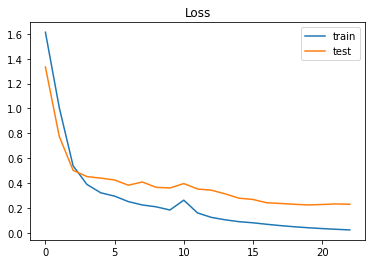

In [42]:
import matplotlib.pyplot as plt
# Loss function
plt.title('Loss')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show();

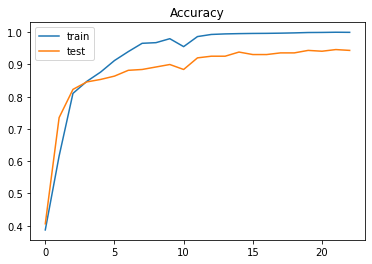

In [43]:
# Accuracy
plt.title('Accuracy')
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.legend()
plt.show();

In [44]:
from sklearn.metrics import confusion_matrix

y_pred = model.predict(X_test)

pd.DataFrame(confusion_matrix(y_test.argmax(axis=1), 
                              y_pred.argmax(axis=1)))

31/31 [==============================] - 7s 214ms/step


,0,1,2,3,4,5
0,54,0,2,3,3,2
1,0,349,0,6,1,0
2,2,0,54,1,0,3
3,5,7,1,177,0,0
4,2,1,0,2,247,0
5,0,0,10,2,0,39


In [45]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score


print(classification_report(y_true=y_test.argmax(axis=1), 
                            y_pred=y_pred.argmax(axis=1)))

              precision    recall  f1-score   support

           0       0.86      0.84      0.85        64
           1       0.98      0.98      0.98       356
           2       0.81      0.90      0.85        60
           3       0.93      0.93      0.93       190
           4       0.98      0.98      0.98       252
           5       0.89      0.76      0.82        51

    accuracy                           0.95       973
   macro avg       0.91      0.90      0.90       973
weighted avg       0.95      0.95      0.95       973



In [46]:
model_tune = tf.keras.models.load_model("model_lstm_tune.h5")

In [47]:
optimizer = tf.keras.optimizers.Adam(learning_rate=0.00029937978660324956)
model_tune.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model with the hyperparameters
history = model_tune.fit(X_train, y_train,
                    epochs=epochs,
                    batch_size=batch_size,
                    validation_split=0.1,
                    callbacks=[EarlyStopping(monitor='val_loss',
                                             patience=3,
                                             min_delta=0.0001)])

Epoch 1/50
55/55 [==============================] - 123s 2s/step - loss: 0.0217 - accuracy: 0.9980 - val_loss: 0.2116 - val_accuracy: 0.9434
Epoch 2/50
55/55 [==============================] - 106s 2s/step - loss: 0.0117 - accuracy: 0.9991 - val_loss: 0.2526 - val_accuracy: 0.9460
Epoch 3/50
55/55 [==============================] - 108s 2s/step - loss: 0.0169 - accuracy: 0.9966 - val_loss: 0.3356 - val_accuracy: 0.9332
Epoch 4/50
55/55 [==============================] - 105s 2s/step - loss: 0.0069 - accuracy: 0.9997 - val_loss: 0.2659 - val_accuracy: 0.9383


In [58]:
from keras.models import load_model
model_tune.save('model_lstm_tune2.h5')

In [51]:
accr = model_tune.evaluate(X_test,y_test)
print('Test set\n\tLoss: {:0.3f}\n\tAccuracy: {:0.3f}'\
      .format(accr[0],accr[1]))

31/31 [==============================] - 3s 112ms/step - loss: 0.2264 - accuracy: 0.9538
Test set
	Loss: 0.226
	Accuracy: 0.954


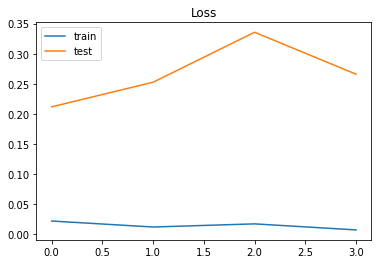

In [52]:
import matplotlib.pyplot as plt
# Loss function
plt.title('Loss')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show();

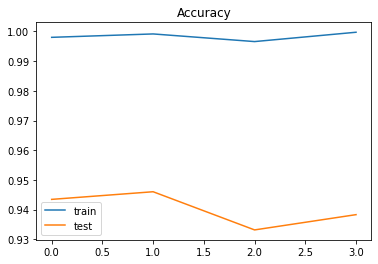

In [53]:
# Accuracy
plt.title('Accuracy')
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.legend()
plt.show();

In [56]:
from sklearn.metrics import confusion_matrix

y_pred = model_tune.predict(X_test)

pd.DataFrame(confusion_matrix(y_test.argmax(axis=1), 
                              y_pred.argmax(axis=1)))

31/31 [==============================] - 5s 128ms/step


,0,1,2,3,4,5
0,57,0,1,2,2,2
1,0,352,0,3,1,0
2,1,0,54,1,1,3
3,3,7,2,177,1,0
4,3,2,0,0,247,0
5,0,0,6,4,0,41


In [57]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score


print(classification_report(y_true=y_test.argmax(axis=1), 
                            y_pred=y_pred.argmax(axis=1)))

              precision    recall  f1-score   support

           0       0.89      0.89      0.89        64
           1       0.98      0.99      0.98       356
           2       0.86      0.90      0.88        60
           3       0.95      0.93      0.94       190
           4       0.98      0.98      0.98       252
           5       0.89      0.80      0.85        51

    accuracy                           0.95       973
   macro avg       0.92      0.92      0.92       973
weighted avg       0.95      0.95      0.95       973

